# Exploratory Data Analysis of Dataset

In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
sns.set(style='whitegrid')

In [ ]:
df_player_stats = pd.read_pickle("../data/raw/player_stats.pkl")

In [182]:
df_player_stats.head()

,Name,Age,#days,Lev,Tm,G,PA,AB,R,H,...,SB,CS,BA,OBP,SLG,OPS,mlbID,year,All Star,Name_clean
1,David Aardsma,26,6217,Maj-AL,Boston,1,1,1,0,0,...,0,0,0.000,0.000,0.000,0.000,430911,2008,0,david aardsma
2,Reggie Abercrombie,27,6218,Maj-NL,Houston,9,11,10,2,3,...,0,1,0.300,0.364,0.700,1.064,430631,2008,0,reggie abercrombie
3,Bobby Abreu,34,6215,Maj-AL,New York,80,344,311,44,88,...,11,4,0.283,0.352,0.457,0.808,110029,2008,0,bobby abreu
4,Manny Acosta,27,6247,Maj-NL,Atlanta,3,3,3,0,0,...,0,0,0.000,0.000,0.000,0.000,407924,2008,0,manny acosta
5,Mike Adams,29,6254,Maj-NL,San Diego,1,1,1,0,0,...,0,0,0.000,0.000,0.000,0.000,430606,2008,0,mike adams


A lot of these columns are not needed so lets remove them.

In [183]:
df_player_stats = df_player_stats.drop(columns=["Name", "#days", "Lev", "Tm", "mlbID", "year", "Name_clean", "Age", "G"])

In [184]:
df_player_stats.head()

,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,...,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS,All Star
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,0.000,0.000,0.000,0
2,11,10,2,3,1,0,1,1,0,0,...,0,0,0,0,1,0.300,0.364,0.700,1.064,0
3,344,311,44,88,18,3,10,53,33,1,...,0,0,8,11,4,0.283,0.352,0.457,0.808,0
4,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,0.000,0.000,0.000,0
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,0.000,0.000,0.000,0


In [185]:
print(df_player_stats.isna().sum())

PA            0
AB            0
R             0
H             0
2B            0
3B            0
HR            0
RBI           0
BB            0
IBB           0
SO            0
HBP           0
SH            0
SF            0
GDP           0
SB            0
CS            0
BA          122
OBP          82
SLG         122
OPS         122
All Star      0
dtype: int64


We have NaN values with BA, OBP, SLG, and OPS because these statistics are computing by divinding other statistics, and there are cases where players may have 0. We can safely treat these NaNs as zeros.

In [186]:
df_player_stats.fillna(0, inplace=True)
print(df_player_stats.isna().sum())

PA          0
AB          0
R           0
H           0
2B          0
3B          0
HR          0
RBI         0
BB          0
IBB         0
SO          0
HBP         0
SH          0
SF          0
GDP         0
SB          0
CS          0
BA          0
OBP         0
SLG         0
OPS         0
All Star    0
dtype: int64


## Distribution of All-Stars

In [187]:
total = len(df_player_stats)
counts = df_player_stats['All Star'].value_counts()
print(f"Total players: {total}")
print(f"All-Stars: {counts.get(1, 0)}")
print(f"Not All-Stars: {counts.get(0, 0)}")

Total players: 11465
All-Stars: 669
Not All-Stars: 10796


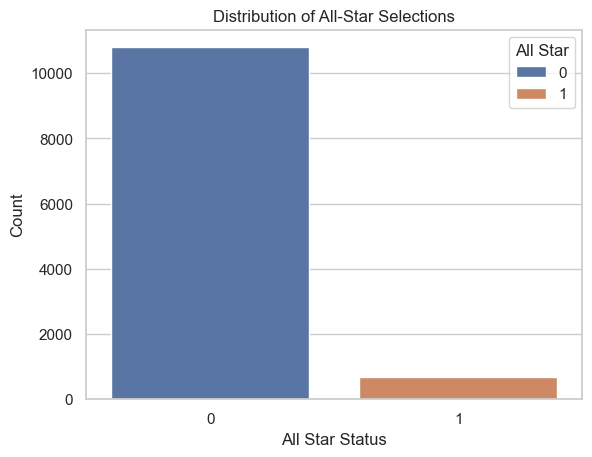

In [188]:
sns.countplot(data=df_player_stats, x="All Star", hue="All Star")

plt.title('Distribution of All-Star Selections')
plt.xlabel('All Star Status')
plt.ylabel('Count')

plt.show()

This clearly shows that there is a strong bias in our data set towards non-All-Star players that will be needed to be addressed.

## Identifying Feature Importance

In [190]:
df_player_stats.keys()

Index(['PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'IBB', 'SO', 'HBP',
       'SH', 'SF', 'GDP', 'SB', 'CS', 'BA', 'OBP', 'SLG', 'OPS', 'All Star'],
      dtype='object')

### Heatmap

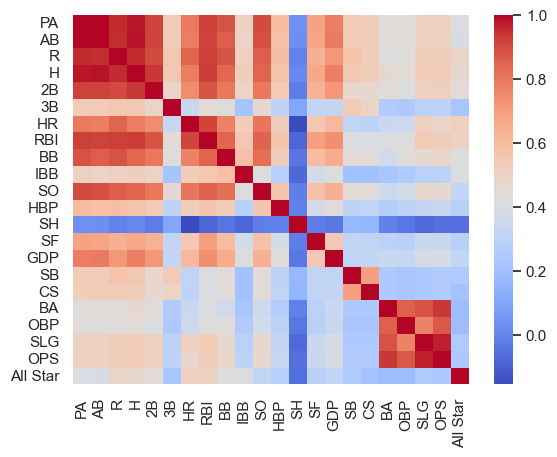

In [189]:
sns.heatmap(df_player_stats.corr(), cmap='coolwarm')
plt.show()

### Random Forest for Feature Importance

In [193]:
from sklearn.ensemble import RandomForestClassifier

In [194]:
X = df_player_stats.drop(columns=['All Star'])
y = df_player_stats['All Star']
model = RandomForestClassifier()
model.fit(X.fillna(0), y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [195]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True, inplace=True)

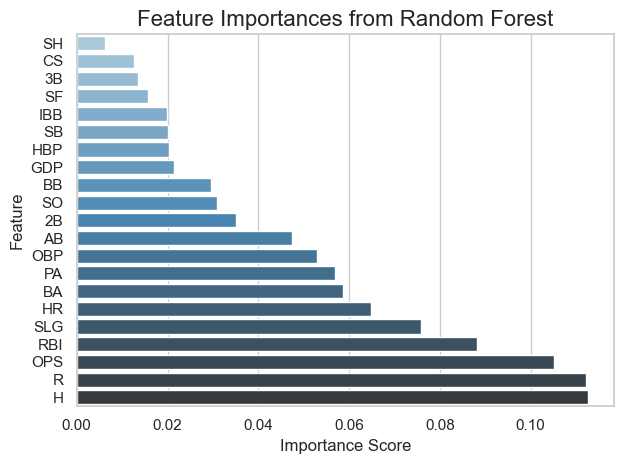

In [196]:
sns.barplot(x=importances.values, y=importances.index, hue=importances.index, palette='Blues_d')

plt.title('Feature Importances from Random Forest', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

We can consider how the Random Forest might change when removing BA, OBP, SLG, and OPS, since these statistics are just a combination of other statistics.

In [ ]:
X = df_player_stats.drop(columns=['All Star', 'BA', 'OBP', 'SLG', 'OPS'])
y = df_player_stats['All Star']

model = RandomForestClassifier()
model.fit(X.fillna(0), y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True, inplace=True)

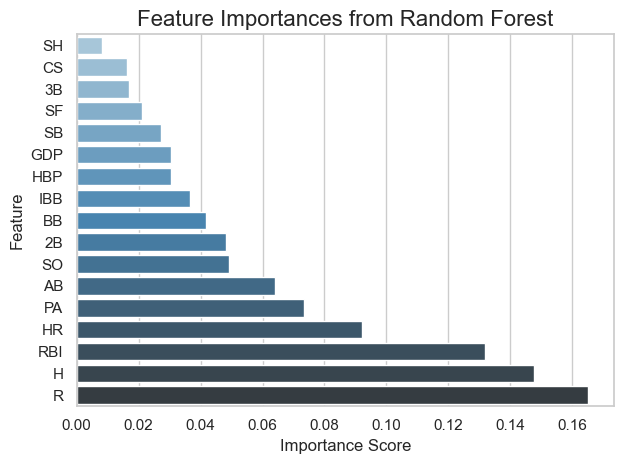

In [199]:
sns.barplot(x=importances.values, y=importances.index, hue=importances.index, palette='Blues_d')
plt.title('Feature Importances from Random Forest', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

### Principal Component Analysis (PCA)
Although we may not training our models utilizing principal components, PCA can give us an understanding of how many features may be important to include as inputs. 

In [203]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [204]:
X = df_player_stats.drop(columns=['All Star', 'Name'], errors='ignore')
X = X.select_dtypes(include='number').fillna(0)
X_scaled = StandardScaler().fit_transform(X) # standarize features

In [205]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

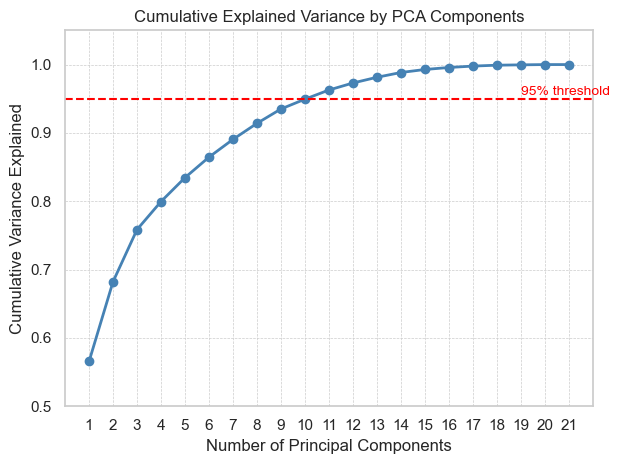

In [215]:
# Plot cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
components = range(1, len(cumulative_variance) + 1)

plt.plot(components, cumulative_variance, marker='o', linestyle='-', color='steelblue', linewidth=2)

# Mark where 95% variance explained occurs
plt.axhline(y=0.95, color='red', linestyle='--', linewidth=1.5)
plt.text(len(components)-2, 0.955, '95% threshold', color='red', fontsize=10)

plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.xticks(components)
plt.ylim(0.5, 1.05)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

To achieve at least 95% explained variance, we would need to utilize at least 10 principal components.

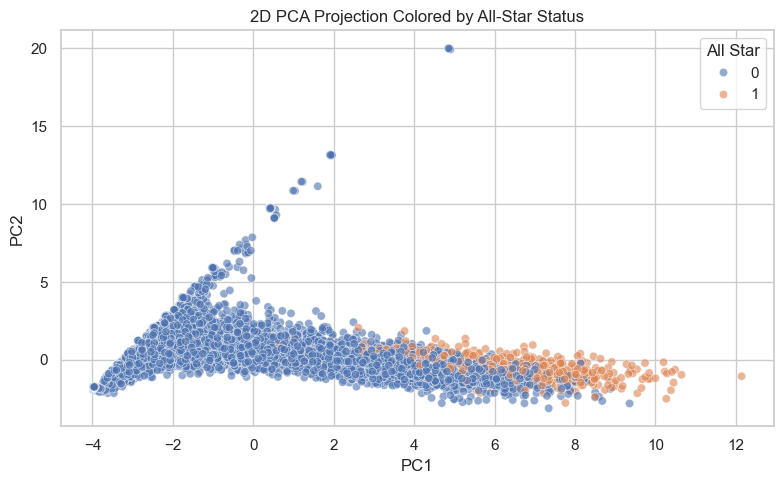

In [220]:
X_pca_2d = X_pca[:, :2]

pca_df = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])
pca_df['All Star'] = df_player_stats['All Star'].values

plt.figure(figsize=(8, 5))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='All Star', alpha=0.6)
plt.title('2D PCA Projection Colored by All-Star Status')
plt.tight_layout()
plt.show()

## Save dataset for training

***Note to self: Move the creation of the dataset used for training (dropping of names, teams, etc.) that occured at the start of the notebook into the prepare_dataset.ipynb. Did not do this because API calls exceeded at the moment.***

In [227]:
df_player_stats.to_pickle("../data/processed/processed_data.pkl")